# Regression Week 4: Ridge Regression (interpretation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Polynomial regression, revisited

In [2]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the dataframe:
    poly_frame = pd.DataFrame()
    # and set poly_frame['power_1'] equal to the passed feature
    poly_frame['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_frame[name] to the appropriate power of feature
            poly_frame[name] = feature.apply(lambda i: i ** power)
    return poly_frame

In [45]:
sales = pd.read_csv('kc_house_data.csv')

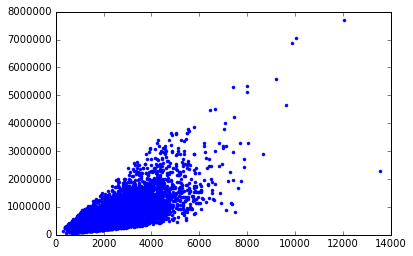

In [46]:
sales = sales.sort(['sqft_living','price'])
plt.plot(sales['sqft_living'],sales['price'],'.')

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
sales['sqft_living'] = scaler.fit_transform(sales['sqft_living'])

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [50]:
l2_small_penalty = 1e-5

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results.  Thus, rather than using no regularization, we will introduce a tiny amount of regularization (`l2_penalty=1e-5`) to make the solution numerically stable.  (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling `graphlab.linear_regression.create()`. Also, make sure GraphLab Create doesn't create its own validation set by using the option `validation_set=None` in this call.

In [51]:
from sklearn.linear_model import Ridge

In [52]:
poly_data = polynomial_frame(sales['sqft_living'], 15)
features = poly_data.columns.tolist()
poly_data['price'] = sales['price']
poly_model = Ridge(alpha=l2_small_penalty)
poly_model = poly_model.fit(poly_data[features], poly_data['price'])
print poly_model.coef_, poly_model.intercept_

[  3.05508883e+06  -2.14446386e+07   1.36688915e+08  -2.01602760e+08
  -5.13041601e+07   1.25982305e+08   1.48602805e+08   6.87734173e+07
  -2.96308134e+07  -9.74068332e+07  -1.18742636e+08  -9.62729103e+07
  -3.96712210e+07   4.03807762e+07   1.34655061e+08] 202519.409733


# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a *high variance*. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `.random_split` function and make sure you set `seed=0`. 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
(semi_split1, semi_split2) = train_test_split(sales, train_size=0.5, random_state=0)
(set_1, set_2) = train_test_split(semi_split1, train_size=0.5, random_state=0)
(set_3, set_4) = train_test_split(semi_split2, train_size=0.5, random_state=0)

Next, fit a 15th degree polynomial on `set_1`, `set_2`, `set_3`, and `set_4`, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model.

Hint: When calling `graphlab.linear_regression.create()`, use the same L2 penalty as before (i.e. `l2_small_penalty`).  Also, make sure GraphLab Create doesn't create its own validation set by using the option `validation_set = None` in this call.

[  2906987.9412319  -16227683.25743312  87559183.94106457
 -58460271.93357595 -82045905.14401591 -28475183.3820682   24763645.22184061
  53484157.25953613  61248678.9998645   57192546.7227848   48302892.67873388
  38517511.52887519  29637809.86246547  22276330.68425907
  16475320.08922414] 200718.811608


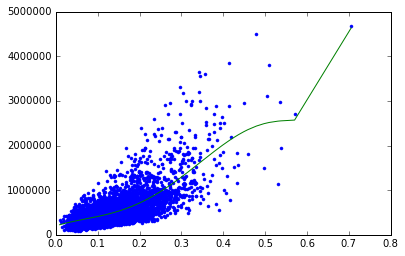

In [55]:
poly_data1 = polynomial_frame(set_1['sqft_living'], 15)
features1 = poly_data1.columns.tolist()
poly_data1['price'] = set_1['price']
poly_model1 = Ridge(alpha=l2_small_penalty)
poly_model1 = poly_model1.fit(poly_data1[features1], poly_data1['price'])
print poly_model1.coef_, poly_model1.intercept_ 
poly_data1 = poly_data1.sort(['power_1'])
plt.plot(poly_data1['power_1'],poly_data1['price'],'.', poly_data1['power_1'], poly_model1.predict(poly_data1[features1]), '-')

[   641031.09692563   5023612.11949657  28455531.85557938 -70717766.8134342
  12541886.59336992  63182652.58538948  45263156.78905418
   1336917.08994545 -35882056.13995461 -55976481.14549491
 -60961793.23224529 -56470954.88740855 -47580826.29657905
 -37661547.42583341 -28523671.01152962] 272286.545308


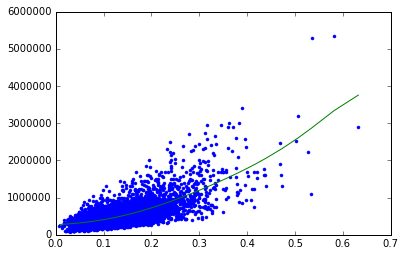

In [56]:
poly_data2 = polynomial_frame(set_2['sqft_living'], 15)
features2 = poly_data2.columns.tolist()
poly_data2['price'] = set_2['price']
poly_model2 = Ridge(alpha=l2_small_penalty)
poly_model2 = poly_model2.fit(poly_data2[features2], poly_data2['price'])
print poly_model2.coef_, poly_model2.intercept_ 
poly_data2 = poly_data2.sort(['power_1'])
plt.plot(poly_data2['power_1'],poly_data2['price'],'.', poly_data2['power_1'], poly_model2.predict(poly_data2[features2]), '-')

[   318349.95030375   6901060.46194464  33651596.711211   -95703084.39897802
  10911311.87449881  82539261.80903348  68912542.14574002
  16518799.35288799 -33268611.1013725  -61847543.38053393
 -65843752.96606896 -48726368.84280267 -15953705.19596959
  27198432.07469444  76386160.93612002] 278034.765623


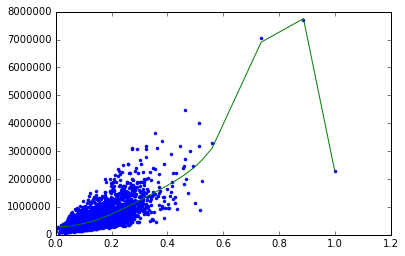

In [57]:
poly_data3 = polynomial_frame(set_3['sqft_living'], 15)
features3 = poly_data3.columns.tolist()
poly_data3['price'] = set_3['price']
poly_model3 = Ridge(alpha=l2_small_penalty)
poly_model3 = poly_model3.fit(poly_data3[features3], poly_data3['price'])
print poly_model3.coef_, poly_model3.intercept_ 
poly_data3 = poly_data3.sort(['power_1'])
plt.plot(poly_data3['power_1'],poly_data3['price'],'.', poly_data3['power_1'], poly_model3.predict(poly_data3[features3]), '-')

[  2.19097247e+06  -1.30733596e+07   9.74015748e+07  -1.27511082e+08
  -6.06320961e+07   5.61420096e+07   1.00019086e+08   8.08509921e+07
   3.68154564e+07  -5.90335479e+06  -3.65194398e+07  -5.36653093e+07
  -5.99787537e+07  -5.90024799e+07  -5.38333202e+07] 235461.775805


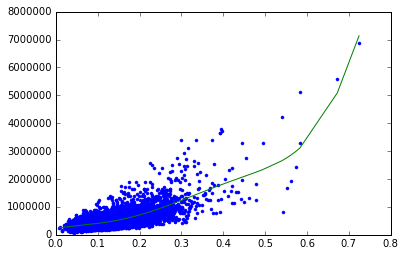

In [58]:
poly_data4 = polynomial_frame(set_4['sqft_living'], 15)
features4 = poly_data4.columns.tolist()
poly_data4['price'] = set_4['price']
poly_model4 = Ridge(alpha=l2_small_penalty)
poly_model4 = poly_model4.fit(poly_data4[features4], poly_data4['price'])
print poly_model4.coef_, poly_model4.intercept_ 
poly_data4 = poly_data4.sort(['power_1'])
plt.plot(poly_data4['power_1'],poly_data4['price'],'.', poly_data4['power_1'], poly_model4.predict(poly_data4[features4]), '-')

# Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (Weights of `model15` looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

With the argument `l2_penalty=1e5`, fit a 15th-order polynomial model on `set_1`, `set_2`, `set_3`, and `set_4`. Other than the change in the `l2_penalty` parameter, the code should be the same as the experiment above. Also, make sure GraphLab Create doesn't create its own validation set by using the option `validation_set = None` in this call.

In [64]:
l2_penalty=10

[  2.36172328e+06   1.16038207e+06   4.91607765e+05   2.13639314e+05
   1.00373689e+05   5.17142297e+04   2.90272320e+04   1.74554442e+04
   1.10398028e+04   7.23021222e+03   4.84792433e+03   3.30215122e+03
   2.27318945e+03   1.57615890e+03   1.09829157e+03] 192307.088711


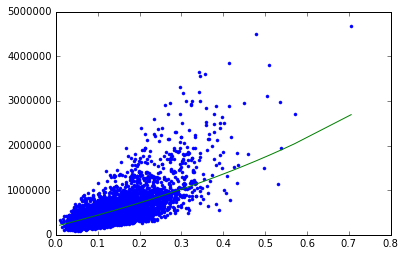

In [65]:
poly_data1 = polynomial_frame(set_1['sqft_living'], 15)
features1 = poly_data1.columns.tolist()
poly_data1['price'] = set_1['price']
poly_model1 = Ridge(alpha=l2_penalty)
poly_model1 = poly_model1.fit(poly_data1[features1], poly_data1['price'])
print poly_model1.coef_, poly_model1.intercept_ 
poly_data1 = poly_data1.sort(['power_1'])
plt.plot(poly_data1['power_1'],poly_data1['price'],'.', poly_data1['power_1'], poly_model1.predict(poly_data1[features1]), '-')

[  2.22724365e+06   1.04485558e+06   4.31346585e+05   1.83466076e+05
   8.32297380e+04   4.02731280e+04   2.05475768e+04   1.09081934e+04
   5.95895445e+03   3.32265790e+03   1.88055059e+03   1.07637497e+03
   6.21531091e+02   3.61475766e+02   2.11512292e+02] 211453.8451


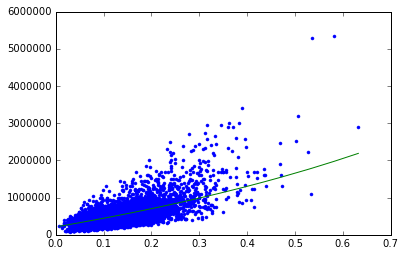

In [66]:
poly_data2 = polynomial_frame(set_2['sqft_living'], 15)
features2 = poly_data2.columns.tolist()
poly_data2['price'] = set_2['price']
poly_model2 = Ridge(alpha=l2_penalty)
poly_model2 = poly_model2.fit(poly_data2[features2], poly_data2['price'])
print poly_model2.coef_, poly_model2.intercept_ 
poly_data2 = poly_data2.sort(['power_1'])
plt.plot(poly_data2['power_1'],poly_data2['price'],'.', poly_data2['power_1'], poly_model2.predict(poly_data2[features2]), '-')

[ 2363164.88089923  1224594.93697737   586505.4274649    298891.81233317
   158401.0174921     78740.3530428     26829.52993014   -10569.61201141
   -39300.06904199   -62268.52607895   -81102.78872      -96812.38447084
  -110075.35708922  -121374.70196755  -131069.4090932 ] 192961.074531


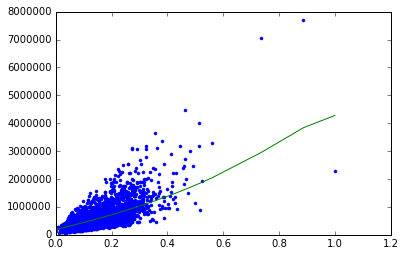

In [69]:
poly_data3 = polynomial_frame(set_3['sqft_living'], 15)
features3 = poly_data3.columns.tolist()
poly_data3['price'] = set_3['price']
poly_model3 = Ridge(alpha=l2_penalty)
poly_model3 = poly_model3.fit(poly_data3[features3], poly_data3['price'])
print poly_model3.coef_, poly_model3.intercept_ 
poly_data3 = poly_data3.sort(['power_1'])
plt.plot(poly_data3['power_1'],poly_data3['price'],'.', poly_data3['power_1'], poly_model3.predict(poly_data3[features3]), '-')

[ 2262135.96790952  1243925.14440269   621893.90648591   331429.97031501
   192027.27246995   118936.21512478    77083.18960437    51437.83193096
    34977.36809269    24085.05838092    16730.7965995     11696.93076769
     8217.76889893     5795.84721916     4100.5857238 ] 199047.956146


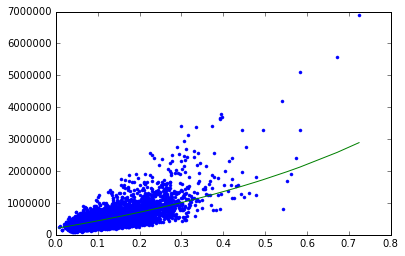

In [70]:
poly_data4 = polynomial_frame(set_4['sqft_living'], 15)
features4 = poly_data4.columns.tolist()
poly_data4['price'] = set_4['price']
poly_model4 = Ridge(alpha=l2_penalty)
poly_model4 = poly_model4.fit(poly_data4[features4], poly_data4['price'])
print poly_model4.coef_, poly_model4.intercept_ 
poly_data4 = poly_data4.sort(['power_1'])
plt.plot(poly_data4['power_1'],poly_data4['price'],'.', poly_data4['power_1'], poly_model4.predict(poly_data4[features4]), '-')

# Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use `seed=1` to get consistent answer.)

In [77]:
(train_valid, test) = train_test_split(sales, train_size=0.9, random_state=1)

In [78]:
from sklearn.utils import shuffle

In [79]:
train_valid_shuffled = shuffle(train_valid, random_state=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

In [80]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
print n
for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

19451
0 (0, 1944)
1 (1945, 3889)
2 (3890, 5834)
3 (5835, 7779)
4 (7780, 9724)
5 (9725, 11669)
6 (11670, 13614)
7 (13615, 15559)
8 (15560, 17504)
9 (17505, 19450)


Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of `train_valid_shuffled`. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [81]:
train_valid_shuffled[0:10] # rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15663,6123600285,20141107T000000,185000.0,3,1.50,0.054340,7755,1.0,0,0,...,6,1010,0,1953,0,98148,47.4238,-122.332,1270,8350
6630,3323059027,20140528T000000,326000.0,3,2.75,0.107925,28000,1.0,0,0,...,7,1720,0,1958,0,98058,47.4375,-122.176,2000,41817
17288,5316100920,20140725T000000,2250000.0,3,4.25,0.366792,7800,2.5,0,2,...,11,4170,980,1954,0,98112,47.6288,-122.282,4270,7800
8276,4315700175,20140612T000000,440000.0,3,1.00,0.069434,5750,1.5,0,0,...,7,1210,0,1910,0,98136,47.5403,-122.391,1160,5000
2376,303000445,20140523T000000,175000.0,2,1.00,0.076226,44431,1.0,0,0,...,6,1300,0,1958,0,98001,47.3270,-122.267,1470,14850
6166,2130410050,20140513T000000,287000.0,3,2.25,0.090566,9600,1.0,0,0,...,7,1170,320,1987,0,98019,47.7378,-121.977,1590,10104
13087,7972601885,20150430T000000,350000.0,5,1.75,0.082264,7620,1.0,0,0,...,7,1180,200,1955,0,98106,47.5279,-122.345,1990,7620
111,3362400511,20150304T000000,570000.0,3,1.75,0.073208,3328,1.0,0,0,...,6,700,560,1905,0,98103,47.6823,-122.349,1380,3536
15851,7889600190,20150113T000000,229000.0,3,1.00,0.098113,6240,1.0,0,0,...,7,1060,530,1956,0,98146,47.4936,-122.337,1410,6240
17305,452002135,20150422T000000,1070000.0,4,2.50,0.184906,5000,2.0,0,0,...,9,2740,0,2012,0,98107,47.6740,-122.371,1660,5000


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [82]:
def k_fold_cross_validation(k, l2_penalty, poly_data, output_name, features_list):
    n = len(poly_data)
    vali_error = 0
    for i in xrange(k):
        start = (n * i) / k
        end = (n*(i+1)/k)-1
        vali_data = poly_data[start:end+1]
        first_train_part = poly_data[0:start]
        second_train_part = poly_data[end+1:n]
        train_data = first_train_part.append(second_train_part)
        ridge = Ridge(alpha=l2_penalty)
        model = ridge.fit(train_data[features_list], train_data[output_name])
        residual = vali_data[output_name] - model.predict(vali_data[features_list])
        vali_error += sum(residual * residual)
    return vali_error / k

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [86]:
(train_valid, test) = train_test_split(sales, train_size=0.9, random_state=1)
train_valid_shuffled = shuffle(train_valid, random_state=1)
poly_data = polynomial_frame(train_valid_shuffled['sqft_living'], 15)
features = poly_data.columns.tolist()
poly_data['price'] = train_valid_shuffled['price']

penalty_list = np.logspace(1, 7, num=13)
lowest_vali_error = float('inf')
lowest_l2 = 0
error_list = []
for l2_penalty in penalty_list:
    model_error = k_fold_cross_validation(10, l2_penalty, poly_data, 'price', features)
    error_list.append(model_error)
    print 'l2_penalty: ' + str(l2_penalty) + "model_error: " + str(model_error)
    if model_error <= lowest_vali_error:
        lowest_vali_error = model_error
        lowest_l2 = l2_penalty
print 'lowest_vali_error: ' + str(lowest_vali_error)
print 'lowest_l2: ' + str(lowest_l2)

l2_penalty: 10.0model_error: 1.29226800354e+14
l2_penalty: 31.6227766017model_error: 1.35819629322e+14
l2_penalty: 100.0model_error: 1.61756650888e+14
l2_penalty: 316.227766017model_error: 2.0511601246e+14
l2_penalty: 1000.0model_error: 2.37717644881e+14
l2_penalty: 3162.27766017model_error: 2.5242914997e+14
l2_penalty: 10000.0model_error: 2.57701459908e+14
l2_penalty: 31622.7766017model_error: 2.59438633272e+14
l2_penalty: 100000.0model_error: 2.59995248674e+14
l2_penalty: 316227.766017model_error: 2.60172002431e+14
l2_penalty: 1000000.0model_error: 2.60227970823e+14
l2_penalty: 3162277.66017model_error: 2.60245676987e+14
l2_penalty: 10000000.0model_error: 2.60251276908e+14
lowest_vali_error: 1.29226800354e+14
lowest_l2: 10.0


***QUIZ QUESTIONS:  What is the best value for the L2 penalty according to 10-fold validation?***

You may find it useful to plot the k-fold cross-validation errors you have obtained to better understand the behavior of the method.  

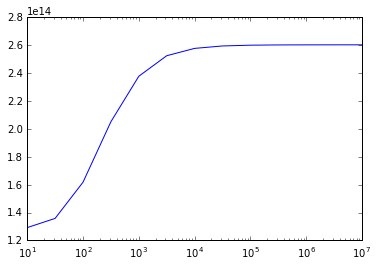

In [88]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.plot(penalty_list, error_list, '-')
plt.xscale('log')

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`.  This way, your final model will be trained on the entire dataset.

In [92]:
final_data = polynomial_frame(train_valid['sqft_living'], 15)
final_data['price'] = train_valid['price']
ridge = Ridge(alpha=10)
final_model = ridge.fit(final_data[features], final_data['price'])

***QUIZ QUESTION: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty? ***

In [94]:
test_data = polynomial_frame(test['sqft_living'], 15)
test_data['price'] = test['price']
test_residual = test['price'] - final_model.predict(test_data[features])
test_rss = sum(test_residual * test_residual)

In [95]:
str(test_rss)

'1.46358016943e+14'